In [52]:
import   numpy                       as  np
import   pandas                      as  pd
import   matplotlib.pyplot           as  plt
import   seaborn                     as  sns
%matplotlib inline
import   scipy.stats                 as stats
import   statsmodels.formula.api     as sm
from     scipy.stats       import    zscore
from     statsmodels.api   import    add_constant
from     sklearn           import    metrics
from     sklearn.tree      import    DecisionTreeClassifier
from     sklearn           import    metrics,tree
from     sklearn.model_selection import train_test_split
from     IPython.display   import    Image
from     os                import    system
from     sklearn.model_selection import GridSearchCV
from     sklearn.ensemble import RandomForestClassifier
from     sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [53]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
df.shape

(768, 9)

In [55]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [56]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

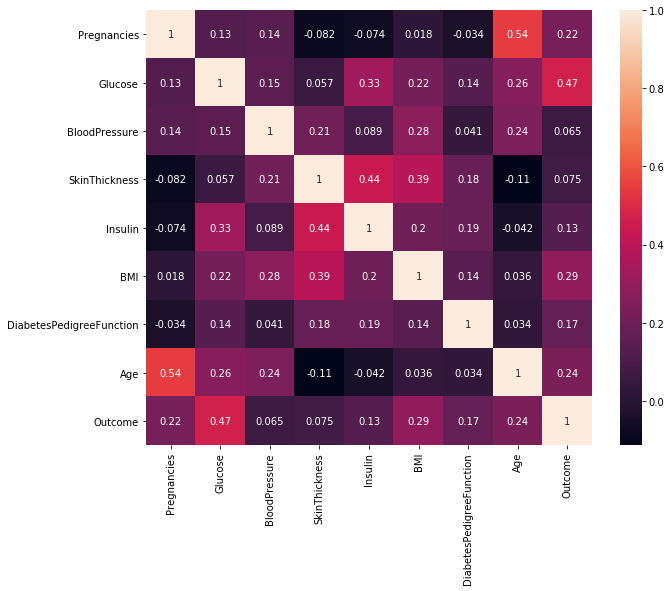

In [57]:
plt.figure(figsize=[10,8])
sns.heatmap(df.corr(),annot=True)
plt.show()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [59]:
x=df.drop('Outcome',axis=1)
y=df.Outcome
x_std=StandardScaler().fit_transform(x)
x_std=pd.DataFrame(x_std,columns=x.columns)
pd.DataFrame(x_std).head()
x_std.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,2.544261e-17,1.000652,-1.141852,-0.844885,-0.250952,0.639947,3.906578
Glucose,768.0,3.614007e-18,1.000652,-3.783654,-0.685236,-0.121888,0.605771,2.444478
BloodPressure,768.0,-1.327244e-17,1.000652,-3.572597,-0.367337,0.149641,0.563223,2.734528
SkinThickness,768.0,7.994184e-17,1.000652,-1.288212,-1.288212,0.154533,0.719086,4.921866
Insulin,768.0,-3.556183e-17,1.000652,-0.692891,-0.692891,-0.428062,0.412008,6.652839
BMI,768.0,2.295979e-16,1.000652,-4.060474,-0.595578,0.000942,0.584771,4.455807
DiabetesPedigreeFunction,768.0,2.398978e-16,1.000652,-1.189553,-0.688969,-0.300128,0.466227,5.883565
Age,768.0,1.857600e-16,1.000652,-1.041549,-0.786286,-0.360847,0.660206,4.063716


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.3,random_state=2)

In [61]:
Xtrain=np.array(x_train)
Ytrain=np.array(y_train)
Xtest=np.array(x_test)
Ytest=np.array(y_test)

In [62]:
x_train.shape

(537, 8)

In [63]:
x_test.shape

(231, 8)

In [64]:
parameter_rf= {'n_estimators':np.arange(1,100),'max_depth':np.arange(1,10)} 
# we are restricting the depth to 10 layers
model=RandomForestClassifier(criterion='entropy',random_state=0)
parameter_dt = {'max_depth':np.arange(1,10)} 
# we are restricting the depth to 10 layers
model1=DecisionTreeClassifier(criterion='entropy',random_state=0)
parameter_kn = {'n_neighbors':np.arange(1,15)} 
# we are restricting the depth to 10 layers
model2=KNeighborsClassifier(weights='uniform',metric='euclidean')


In [65]:
GS_dt= GridSearchCV(model1,parameter_dt,cv=5) # we give the model created  above inside the GridSearch to give best number of Parameters
GS_dt.fit(x_std,y)
print(GS_dt.best_params_)

{'max_depth': 3}


In [66]:
GS_rf= GridSearchCV(model,parameter_rf,cv=5) # we give the model created  above inside the GridSearch to give best number of Parameters
GS_rf.fit(x_std,y)
print(GS_rf.best_params_)


{'max_depth': 9, 'n_estimators': 24}


In [67]:
GS_kn= GridSearchCV(model2,parameter_kn,cv=5) # we give the model created  above inside the GridSearch to give best number of Parameters
GS_kn.fit(x_std,y)
print(GS_kn.best_params_)

{'n_neighbors': 13}


In [68]:
# Model Comparison's for 4 models
DT_model=DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=0)
DT_model.fit(x_train,y_train)
pred1=DT_model.predict(x_test)
Rf_model=RandomForestClassifier(n_estimators=24,max_depth=9,criterion='entropy',random_state=0)
Rf_model.fit(x_train,y_train)
pred2=Rf_model.predict(x_test)
Nb_model=GaussianNB()
Nb_model.fit(x_train,y_train)
pred3=Nb_model.predict(x_test)
LOr_model=LogisticRegression()
LOr_model.fit(x_train,y_train)
pred4=LOr_model.predict(x_test)
Kn_model=KNeighborsClassifier(n_neighbors=13,weights='uniform',metric='euclidean')
Kn_model.fit(x_train,y_train)
pred5=Kn_model.predict(x_test)
#knn_model==KNeighborsRegressor(n_neighbors=k,weights='uniform',metric='euclidean')

In [75]:
pd.crosstab(y_test,pred3)

col_0,0,1
Outcome,,
0,136,19
1,34,42


In [76]:
42/76

0.5526315789473685

Decision Tree:  Performance Range is  (67.273 - 83.636) with a Varience error of (0.049701) and mean of 75.136
Random Forest:  Performance Range is  (69.091 - 80.734) with a Varience error of (0.045719) and mean of 75.522
Naive Bayes:  Performance Range is  (70.909 - 80.734) with a Varience error of (0.027821) and mean of 75.265
Logistic Regression:  Performance Range is  (70.000 - 84.404) with a Varience error of (0.041021) and mean of 77.353
KNN:  Performance Range is  (66.364 - 83.486) with a Varience error of (0.046664) and mean of 74.750


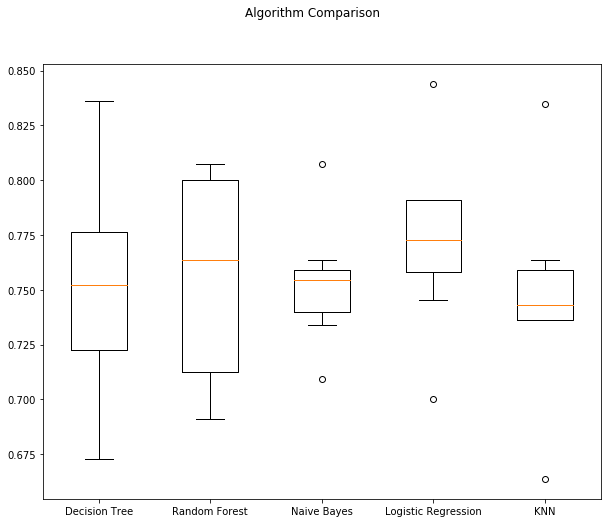

In [69]:
# kfold cross validation
mod=[]
mod.append(('Decision Tree',DT_model))
mod.append(('Random Forest',Rf_model))
mod.append(('Naive Bayes',Nb_model))
mod.append(('Logistic Regression',LOr_model))
mod.append(('KNN',Kn_model))
result=[]
names=[]
scoring='accuracy'
for name,model in mod:
    kfold=model_selection.KFold(n_splits=7,random_state=2)# 5 fold cross validation function
    cv_results=model_selection.cross_val_score(model,x_std,y,cv=kfold,scoring='accuracy')
    result.append(cv_results)
    names.append(name)
    msg="%s:  Performance Range is  (%1.3f %s %1.3f) with a Varience error of (%f) and mean of %1.3f"%(name,cv_results.min()*100,'-',cv_results.max()*100,cv_results.std(),cv_results.mean()*100)
    print(msg)
# boxplot for the models

fig=plt.figure(figsize=[10,8])
fig.suptitle("Algorithm Comparison")
ax=fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()


C:\Users\HII\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


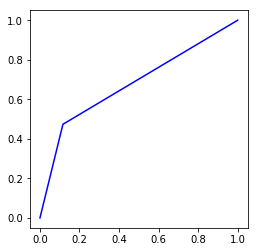

AUC value is : 0.6787775891341256


In [81]:
#ROC and AUC for Logistic Regression 
pred_ = LOr_model.predict_proba(x_test)
fpr,tpr,threshold = metrics.roc_curve(y_test,pred4)
plt.plot(fpr,tpr,label = 'Roc curve',color = 'b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.show()
AUC = metrics.auc(fpr,tpr)
print("AUC value is :",AUC)

C:\Users\HII\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


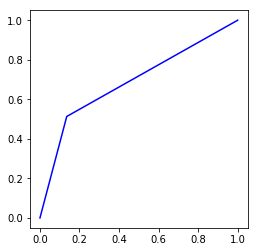

AUC value is : 0.68883701188455


In [82]:
#ROC and AUC for Random Forest 
pred_ = Rf_model.predict_proba(x_test)
fpr,tpr,threshold = metrics.roc_curve(y_test,pred2)
plt.plot(fpr,tpr,label = 'Roc curve',color = 'b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.show()
AUC = metrics.auc(fpr,tpr)
print("AUC value is :",AUC)

C:\Users\HII\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


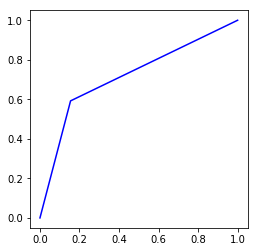

AUC value is : 0.7186332767402377


In [83]:
#ROC and AUC for Decision Tree 
pred_ = DT_model.predict_proba(x_test)
fpr,tpr,threshold = metrics.roc_curve(y_test,pred1)
plt.plot(fpr,tpr,label = 'Roc curve',color = 'b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.show()
AUC = metrics.auc(fpr,tpr)
print("AUC value is :",AUC)

C:\Users\HII\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


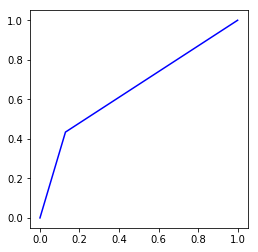

AUC value is : 0.6525891341256366


In [80]:
#ROC and AUC for Knn Regression 
pred_ = Kn_model.predict_proba(x_test)
fpr,tpr,threshold = metrics.roc_curve(y_test,pred5)
plt.plot(fpr,tpr,label = 'Roc curve',color = 'b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.show()
AUC = metrics.auc(fpr,tpr)
print("AUC value is :",AUC)

C:\Users\HII\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


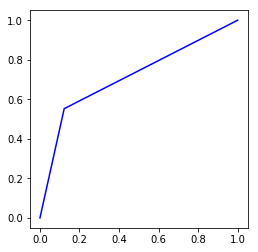

AUC value is : 0.7150254668930391


In [79]:
#ROC and AUC for Naive Bayes 
pred_ = Nb_model.predict_proba(x_test)
fpr,tpr,threshold = metrics.roc_curve(y_test,pred3)
plt.plot(fpr,tpr,label = 'Roc curve',color = 'b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.show()
AUC = metrics.auc(fpr,tpr)
print("AUC value is :",AUC)